In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os
from util import HISTORICAL_FILE, HISTORICAL_DB_KEEP_OUT, RESOURCE_DIR, IMAGES_DIR

In [6]:
df = pd.read_excel(HISTORICAL_FILE, keep_default_na=False)
#reads projects from Excel file

len(df)
df.head()

,owner,name,domain,sha1,part_commit,date_commit,isLast,SapHana,Realm,SAP SQL Anywhere,...,ClickHouse,Kdb+,Virtuoso-NoSql,HBase,Firebird,Cassandra,Couchbase,Etcd,PostGIS,Redis
0,Activiti,Activiti,Enterprise Resource Planning,7262dc3913045001cbc658a8474e9d295980c345,1,2010-07-14 06:36:18+00:00,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Activiti,Activiti,Enterprise Resource Planning,38b284602be9dcb6b4253cfa1c2f9420c002b56a,2,2010-08-03 08:31:19+00:00,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Activiti,Activiti,Enterprise Resource Planning,fbcdc18a66e7f7960a7ed966f87b1527c5c7551a,3,2010-09-02 09:45:24+00:00,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Activiti,Activiti,Enterprise Resource Planning,8d05dda18ce4c5db6f30cf01d7e0c2059b1a5388,4,2010-09-16 15:33:33+00:00,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Activiti,Activiti,Enterprise Resource Planning,a789ba2b30383777b4d0d81bbc62a90a24dbb032,5,2010-09-23 13:38:28+00:00,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Combining the heuristics of Multimodel DBs (Ignite and Virtuoso)

In [7]:
df.columns

Index(['owner', 'name', 'domain', 'sha1', 'part_commit', 'date_commit',
       'isLast', 'SapHana', 'Realm', 'SAP SQL Anywhere', 'FileMaker',
       'Virtuoso', 'ArangoDB', 'Informix', 'HyperSQL', 'CouchDB', 'Riak KV',
       'Ignite', 'Virtuoso-Sql', 'Neo4j', 'Singlestore', 'Snowflake',
       'Ignite-Sql', 'MarkLogic', 'Hazelcast', 'GoogleCloudFilestore',
       'Influx DB', 'H2', 'Ignite-NoSql', 'Interbase', 'Teradata', 'Oracle',
       'Impala', 'Microsoft Azure CosmosDB', 'MySQL_Maria DB', 'MS Access',
       'Microsoft Azure Table Storage', 'Aerospike', 'IBM DB2', 'DynamoDB',
       'Vertica', 'Ingres', 'MongoDB',
       'MS SQL Server_Microsoft Azure SQL Database', 'Google Cloud Datastore',
       'Firebase Realtime', 'SQLite', 'PostgreSQL_ CockroachDB',
       'SAP Adaptive Server', 'ClickHouse', 'Kdb+', 'Virtuoso-NoSql', 'HBase',
       'Firebird', 'Cassandra', 'Couchbase', 'Etcd', 'PostGIS', 'Redis'],
      dtype='object')

In [8]:
df["Join_Ignite-Sql"] = df["Ignite"] +  df["Ignite-Sql"]
df["Join_Ignite-NoSql"] = df["Ignite"] +  df["Ignite-NoSql"]
#df["Join_MarkLogic-Sql"] = df["MarkLogic"] +  df["MarkLogic-Sql"]
#df["Join_MarkLogic-NoSql"] = df["MarkLogic"] +  df["MarkLogic-NoSql"]
df["Join_Virtuoso-Sql"] = df["Virtuoso"] +  df["Virtuoso-Sql"] #(Não virtuoso SQL como resultado)
df["Join_Virtuoso-NoSql"] = df["Virtuoso"] +  df["Virtuoso-NoSql"]

df.rename(columns={'MySQL_Maria DB': 'MySQL'}, inplace=True)
df.rename(columns={'PostgreSQL_ CockroachDB': 'PostgreSQL'}, inplace=True)
df.rename(columns={'MS SQL Server_Microsoft Azure SQL Database': 'MS SQL Server'}, inplace=True)
df.rename(columns={'GoogleCloudFilestore': 'GoogleCloudFirestore'}, inplace=True)
#df.rename(columns={'Join_Ignite-Sql': 'Ignite-Sql'}, inplace=True)
#df.rename(columns={'Join_Ignite-NoSql': 'Ignite-NoSql'}, inplace=True)


df

,owner,name,domain,sha1,part_commit,date_commit,isLast,SapHana,Realm,SAP SQL Anywhere,...,Firebird,Cassandra,Couchbase,Etcd,PostGIS,Redis,Join_Ignite-Sql,Join_Ignite-NoSql,Join_Virtuoso-Sql,Join_Virtuoso-NoSql
0,Activiti,Activiti,Enterprise Resource Planning,7262dc3913045001cbc658a8474e9d295980c345,1,2010-07-14 06:36:18+00:00,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Activiti,Activiti,Enterprise Resource Planning,38b284602be9dcb6b4253cfa1c2f9420c002b56a,2,2010-08-03 08:31:19+00:00,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Activiti,Activiti,Enterprise Resource Planning,fbcdc18a66e7f7960a7ed966f87b1527c5c7551a,3,2010-09-02 09:45:24+00:00,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Activiti,Activiti,Enterprise Resource Planning,8d05dda18ce4c5db6f30cf01d7e0c2059b1a5388,4,2010-09-16 15:33:33+00:00,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Activiti,Activiti,Enterprise Resource Planning,a789ba2b30383777b4d0d81bbc62a90a24dbb032,5,2010-09-23 13:38:28+00:00,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31111,liferay,liferay-portal,Enterprise Resource Planning,fcd4cd6526c80613eca69927effe931bb6a91444,8209,2024-10-07 12:05:23+00:00,False,0,0,1,...,0,0,0,0,1,1,0,0,0,0
31112,liferay,liferay-portal,Enterprise Resource Planning,cc0ab8103195e543056639c8c2883fcc187c33a2,8210,2024-10-07 17:58:58+00:00,False,0,0,1,...,0,0,0,0,1,1,0,0,0,0
31113,liferay,liferay-portal,Enterprise Resource Planning,f75082029372ab28694650bd3fe9fae4d548351e,8211,2024-10-11 04:36:52+00:00,False,0,0,1,...,0,0,0,0,1,1,0,0,0,0
31114,liferay,liferay-portal,Enterprise Resource Planning,a80a679a86d2867f985bafa510d9d12f1bf051a7,8212,2024-10-11 16:53:22+00:00,False,0,0,1,...,0,0,0,0,1,1,0,0,0,0


Deleting the heuristics of the Bd Multimodels that were alone 

In [9]:
df2 = df

df2.drop(["Ignite", "Ignite-Sql","Ignite-NoSql", #"MarkLogic","MarkLogic-Sql","MarkLogic-NoSql", 
          "Virtuoso", "Virtuoso-Sql", "Virtuoso-NoSql"], axis=1, inplace=True)
df2

,owner,name,domain,sha1,part_commit,date_commit,isLast,SapHana,Realm,SAP SQL Anywhere,...,Firebird,Cassandra,Couchbase,Etcd,PostGIS,Redis,Join_Ignite-Sql,Join_Ignite-NoSql,Join_Virtuoso-Sql,Join_Virtuoso-NoSql
0,Activiti,Activiti,Enterprise Resource Planning,7262dc3913045001cbc658a8474e9d295980c345,1,2010-07-14 06:36:18+00:00,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Activiti,Activiti,Enterprise Resource Planning,38b284602be9dcb6b4253cfa1c2f9420c002b56a,2,2010-08-03 08:31:19+00:00,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Activiti,Activiti,Enterprise Resource Planning,fbcdc18a66e7f7960a7ed966f87b1527c5c7551a,3,2010-09-02 09:45:24+00:00,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Activiti,Activiti,Enterprise Resource Planning,8d05dda18ce4c5db6f30cf01d7e0c2059b1a5388,4,2010-09-16 15:33:33+00:00,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Activiti,Activiti,Enterprise Resource Planning,a789ba2b30383777b4d0d81bbc62a90a24dbb032,5,2010-09-23 13:38:28+00:00,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31111,liferay,liferay-portal,Enterprise Resource Planning,fcd4cd6526c80613eca69927effe931bb6a91444,8209,2024-10-07 12:05:23+00:00,False,0,0,1,...,0,0,0,0,1,1,0,0,0,0
31112,liferay,liferay-portal,Enterprise Resource Planning,cc0ab8103195e543056639c8c2883fcc187c33a2,8210,2024-10-07 17:58:58+00:00,False,0,0,1,...,0,0,0,0,1,1,0,0,0,0
31113,liferay,liferay-portal,Enterprise Resource Planning,f75082029372ab28694650bd3fe9fae4d548351e,8211,2024-10-11 04:36:52+00:00,False,0,0,1,...,0,0,0,0,1,1,0,0,0,0
31114,liferay,liferay-portal,Enterprise Resource Planning,a80a679a86d2867f985bafa510d9d12f1bf051a7,8212,2024-10-11 16:53:22+00:00,False,0,0,1,...,0,0,0,0,1,1,0,0,0,0


Renaming the Multimodel DB heuristics 

In [10]:
df2['Join_Ignite-Sql']= df2['Join_Ignite-Sql'].replace([2,1],[1,0])
df2['Join_Ignite-NoSql']= df2['Join_Ignite-NoSql'].replace([2,1],[1,0])
#df2['Join_MarkLogic-Sql']= df2['Join_MarkLogic-Sql'].replace([2,1],[1,0])
#df2['Join_MarkLogic-NoSql']= df2['Join_MarkLogic-NoSql'].replace([2,1],[1,0])
df2['Join_Virtuoso-Sql']= df2['Join_Virtuoso-Sql'].replace([2,1],[1,0])
df2['Join_Virtuoso-NoSql']= df2['Join_Virtuoso-Sql'].replace([2,1],[1,0])
df2

,owner,name,domain,sha1,part_commit,date_commit,isLast,SapHana,Realm,SAP SQL Anywhere,...,Firebird,Cassandra,Couchbase,Etcd,PostGIS,Redis,Join_Ignite-Sql,Join_Ignite-NoSql,Join_Virtuoso-Sql,Join_Virtuoso-NoSql
0,Activiti,Activiti,Enterprise Resource Planning,7262dc3913045001cbc658a8474e9d295980c345,1,2010-07-14 06:36:18+00:00,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Activiti,Activiti,Enterprise Resource Planning,38b284602be9dcb6b4253cfa1c2f9420c002b56a,2,2010-08-03 08:31:19+00:00,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Activiti,Activiti,Enterprise Resource Planning,fbcdc18a66e7f7960a7ed966f87b1527c5c7551a,3,2010-09-02 09:45:24+00:00,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Activiti,Activiti,Enterprise Resource Planning,8d05dda18ce4c5db6f30cf01d7e0c2059b1a5388,4,2010-09-16 15:33:33+00:00,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Activiti,Activiti,Enterprise Resource Planning,a789ba2b30383777b4d0d81bbc62a90a24dbb032,5,2010-09-23 13:38:28+00:00,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31111,liferay,liferay-portal,Enterprise Resource Planning,fcd4cd6526c80613eca69927effe931bb6a91444,8209,2024-10-07 12:05:23+00:00,False,0,0,1,...,0,0,0,0,1,1,0,0,0,0
31112,liferay,liferay-portal,Enterprise Resource Planning,cc0ab8103195e543056639c8c2883fcc187c33a2,8210,2024-10-07 17:58:58+00:00,False,0,0,1,...,0,0,0,0,1,1,0,0,0,0
31113,liferay,liferay-portal,Enterprise Resource Planning,f75082029372ab28694650bd3fe9fae4d548351e,8211,2024-10-11 04:36:52+00:00,False,0,0,1,...,0,0,0,0,1,1,0,0,0,0
31114,liferay,liferay-portal,Enterprise Resource Planning,a80a679a86d2867f985bafa510d9d12f1bf051a7,8212,2024-10-11 16:53:22+00:00,False,0,0,1,...,0,0,0,0,1,1,0,0,0,0


Generating the file with all the BD heuristics including the Multimodel BD combinations 

In [11]:
HISTORICAL_FILE_JOIN = RESOURCE_DIR + os.sep + 'historical_join.xlsx'
df.to_excel(HISTORICAL_FILE_JOIN, index=False)
#df2 = df2.to_excel("historical_join.xlsx", index=False)

In [12]:
df

,owner,name,domain,sha1,part_commit,date_commit,isLast,SapHana,Realm,SAP SQL Anywhere,...,Firebird,Cassandra,Couchbase,Etcd,PostGIS,Redis,Join_Ignite-Sql,Join_Ignite-NoSql,Join_Virtuoso-Sql,Join_Virtuoso-NoSql
0,Activiti,Activiti,Enterprise Resource Planning,7262dc3913045001cbc658a8474e9d295980c345,1,2010-07-14 06:36:18+00:00,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Activiti,Activiti,Enterprise Resource Planning,38b284602be9dcb6b4253cfa1c2f9420c002b56a,2,2010-08-03 08:31:19+00:00,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Activiti,Activiti,Enterprise Resource Planning,fbcdc18a66e7f7960a7ed966f87b1527c5c7551a,3,2010-09-02 09:45:24+00:00,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Activiti,Activiti,Enterprise Resource Planning,8d05dda18ce4c5db6f30cf01d7e0c2059b1a5388,4,2010-09-16 15:33:33+00:00,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Activiti,Activiti,Enterprise Resource Planning,a789ba2b30383777b4d0d81bbc62a90a24dbb032,5,2010-09-23 13:38:28+00:00,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31111,liferay,liferay-portal,Enterprise Resource Planning,fcd4cd6526c80613eca69927effe931bb6a91444,8209,2024-10-07 12:05:23+00:00,False,0,0,1,...,0,0,0,0,1,1,0,0,0,0
31112,liferay,liferay-portal,Enterprise Resource Planning,cc0ab8103195e543056639c8c2883fcc187c33a2,8210,2024-10-07 17:58:58+00:00,False,0,0,1,...,0,0,0,0,1,1,0,0,0,0
31113,liferay,liferay-portal,Enterprise Resource Planning,f75082029372ab28694650bd3fe9fae4d548351e,8211,2024-10-11 04:36:52+00:00,False,0,0,1,...,0,0,0,0,1,1,0,0,0,0
31114,liferay,liferay-portal,Enterprise Resource Planning,a80a679a86d2867f985bafa510d9d12f1bf051a7,8212,2024-10-11 16:53:22+00:00,False,0,0,1,...,0,0,0,0,1,1,0,0,0,0


Number of commits that showed evidence of use by database

In [13]:
#df
df = df.drop(columns=['date_commit'])
df.iloc[: , 6:].sum().sort_values(ascending=False)

MySQL                            17516
PostgreSQL                       15097
Oracle                           14009
HyperSQL                         13948
H2                               13780
Redis                            11426
MS SQL Server                    10925
IBM DB2                          10430
SAP SQL Anywhere                  8485
SAP Adaptive Server               8414
PostGIS                           7555
HBase                             4857
MongoDB                           4288
Cassandra                         3583
DynamoDB                          2605
Google Cloud Datastore            2424
SQLite                            2069
Hazelcast                         1815
Ingres                            1794
Informix                          1215
Firebird                           953
Couchbase                          925
MarkLogic                          893
Teradata                           878
ClickHouse                         723
MS Access                

In [14]:
#Teste para encontrar repos com o mesmo nome
#dfnomes = df['PROJECTS'].unique()
#dfnomes = pd.DataFrame(data=dfnomes)
#dfnomes
#dfnomes.to_excel('nomes_historical_join_new.xlsx', index=False)
selecao = df['name'].str.startswith('android')
dfteste = df[selecao]
dfteste
#dfnomes.merge(df, on=['PROJECTS'], how='outer', suffixes=['', '_'], indicator=True)
#dfnomes
#dfnomes.merge(df, on=['PROJECTS'], how='outer', suffixes=['', '_'], indicator=True)
#dfnomes
#df_mer= pd.merge(dfnomes, df, on= 'PROJECTS', how='outer', suffixes=['', '_'], indicator=True)
#df_mer
#df_mer.to_excel('compara_nomes_projects.xlsx',index=True)
#duplicados = df.duplicated()
#duplicados.sum()
#dfnomes = pd.DataFrame(data=duplicados)

,owner,name,domain,sha1,part_commit,isLast,SapHana,Realm,SAP SQL Anywhere,FileMaker,...,Firebird,Cassandra,Couchbase,Etcd,PostGIS,Redis,Join_Ignite-Sql,Join_Ignite-NoSql,Join_Virtuoso-Sql,Join_Virtuoso-NoSql
7155,cSploit,android,Security,ebfdd10dd8090c0e0542a2a4e25f48b917c51400,1,False,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7156,cSploit,android,Security,a8be3fbaa81d553778a8ac4dd9bfdb1421bcb859,2,False,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7157,cSploit,android,Security,e92d0b255e2c683c3a94dfeb91adc3d558444603,3,False,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7158,cSploit,android,Security,88bc1056fcea90c3df3100e5b17f16b465b1f460,4,False,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7159,cSploit,android,Security,c5330c991992bef50201de408a86625038e51f0a,5,False,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19169,simpligility,android-maven-plugin,Software Development,b6ccfaa378b8f8bcbcf98ab308d41e013f7fd325,10,False,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19170,simpligility,android-maven-plugin,Software Development,fc794131dea5ccbccf0a53aa89432e076e6a2940,11,False,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19171,simpligility,android-maven-plugin,Software Development,ce908f1270112f91a34d10a46f8dc0649ed7b736,12,False,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19172,simpligility,android-maven-plugin,Software Development,bf39e03d392ba9e32a4a05bfcf32c44eafa71a2b,13,False,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
df2 = df.groupby(["owner", "name"]).sum()
#df2 = df["COMMITS"].sum().sort_values(ascending=False)
#df2.iloc[: , 1:] => para ocultar a linha COMMITS
df3 = df2.iloc[: , 1:]
df4 = df3.T
df4

owner,Activiti,Alluxio,AlmasB,AntennaPod,AnySoftKeyboard,AsyncHttpClient,Athou,Atmosphere,Automattic,AxonFramework,...,vipshop,vsch,webbukkit,wildfly,winder,xuxueli,yacy,zaproxy,zendesk,zxing
name,Activiti,alluxio,FXGL,AntennaPod,AnySoftKeyboard,async-http-client,commafeed,atmosphere,simplenote-android,AxonFramework,...,Saturn,flexmark-java,dynmap,wildfly,Universal-G-Code-Sender,xxl-job,yacy_search_server,zaproxy,maxwell,zxing
isLast,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SapHana,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Realm,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SAP SQL Anywhere,32,0,0,0,0,0,11,0,0,0,...,0,0,0,143,0,0,0,0,0,0
FileMaker,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ArangoDB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Informix,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HyperSQL,13,0,0,0,0,0,10,0,0,35,...,0,0,0,203,0,0,0,36,0,0
CouchDB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Number of Projects in which there was evidence of use by Database 

In [16]:
def num_missing(x):
   return sum(x >= 1)
#df2.apply(num_missing, axis=0).sort_values(ascending=False)
#without COMMITS
df2.iloc[: , 2:].apply(num_missing, axis=0).sort_values(ascending=False)

MySQL                            137
H2                               114
PostgreSQL                       102
Oracle                            94
Redis                             90
HyperSQL                          81
MS SQL Server                     67
MongoDB                           51
Google Cloud Datastore            43
IBM DB2                           41
SQLite                            40
Hazelcast                         34
DynamoDB                          33
Cassandra                         31
SAP SQL Anywhere                  25
SAP Adaptive Server               24
HBase                             24
Neo4j                             17
Informix                          15
Firebird                          14
MarkLogic                         13
MS Access                         13
ClickHouse                        11
Teradata                          11
PostGIS                           11
SapHana                           11
Couchbase                          9
S

In [17]:
df4['SumperDatabase'] = df2.iloc[: , 2:].apply(num_missing, axis=0).sort_values(ascending=False)
df4

owner,Activiti,Alluxio,AlmasB,AntennaPod,AnySoftKeyboard,AsyncHttpClient,Athou,Atmosphere,Automattic,AxonFramework,...,vsch,webbukkit,wildfly,winder,xuxueli,yacy,zaproxy,zendesk,zxing,SumperDatabase
name,Activiti,alluxio,FXGL,AntennaPod,AnySoftKeyboard,async-http-client,commafeed,atmosphere,simplenote-android,AxonFramework,...,flexmark-java,dynmap,wildfly,Universal-G-Code-Sender,xxl-job,yacy_search_server,zaproxy,maxwell,zxing,
isLast,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
SapHana,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11.0
Realm,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.0
SAP SQL Anywhere,32,0,0,0,0,0,11,0,0,0,...,0,0,143,0,0,0,0,0,0,25.0
FileMaker,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
ArangoDB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.0
Informix,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15.0
HyperSQL,13,0,0,0,0,0,10,0,0,35,...,0,0,203,0,0,0,36,0,0,81.0
CouchDB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.0


In [18]:
df2

,,part_commit,isLast,SapHana,Realm,SAP SQL Anywhere,FileMaker,ArangoDB,Informix,HyperSQL,CouchDB,...,Firebird,Cassandra,Couchbase,Etcd,PostGIS,Redis,Join_Ignite-Sql,Join_Ignite-NoSql,Join_Virtuoso-Sql,Join_Virtuoso-NoSql
owner,name,,,,,,,,,,,,,,,,,,,,,
Activiti,Activiti,1540,0,0,0,32,0,0,0,13,0,...,0,0,0,0,0,0,0,0,0,0
Alluxio,alluxio,5886,0,0,0,0,0,0,0,0,0,...,0,0,0,4,0,0,0,0,0,0
AlmasB,FXGL,105,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AntennaPod,AntennaPod,703,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AnySoftKeyboard,AnySoftKeyboard,703,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
xuxueli,xxl-job,120,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
yacy,yacy_search_server,5151,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zaproxy,zaproxy,666,0,0,0,0,0,0,0,36,0,...,0,0,0,0,0,0,0,0,0,0


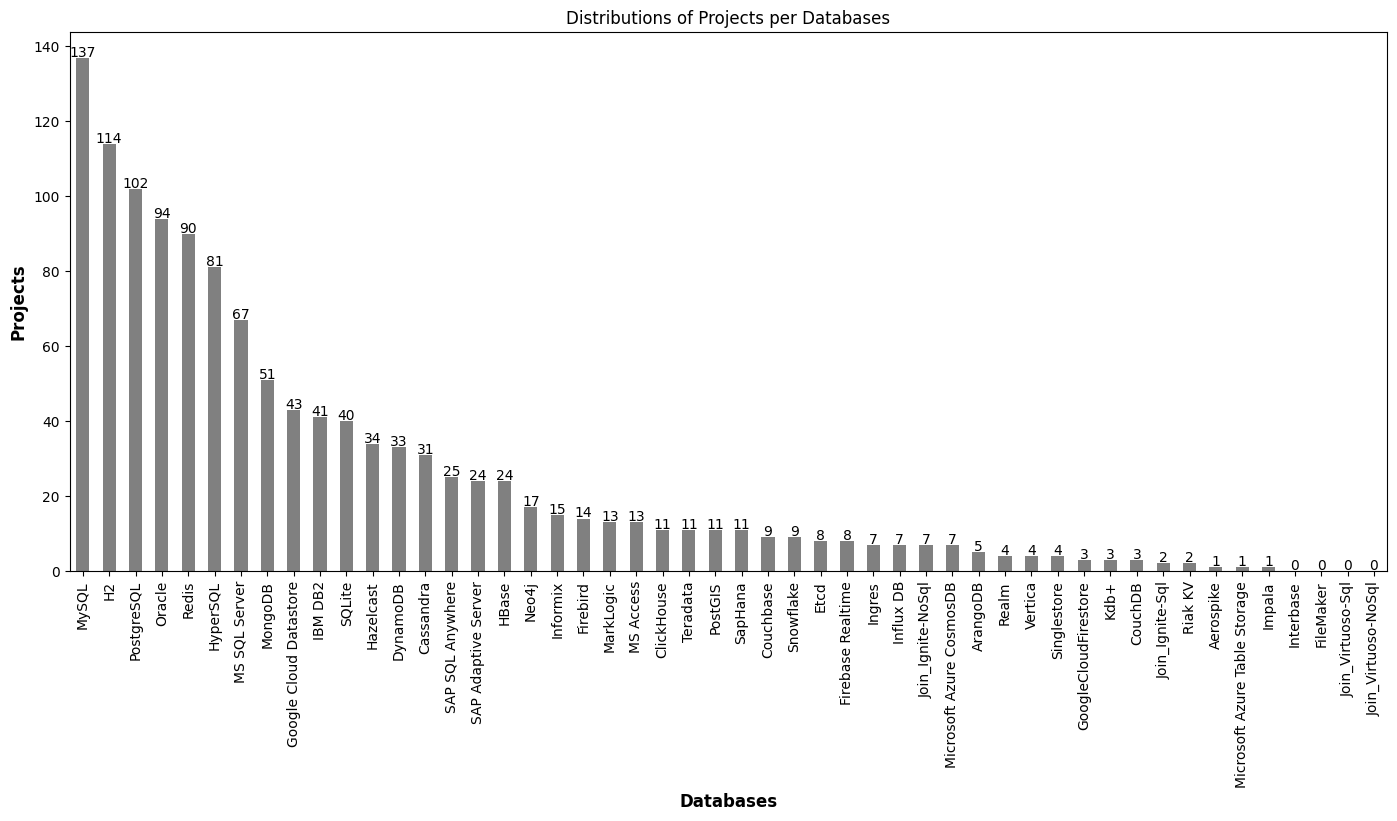

In [19]:
plt.figure(figsize=(17,7))
plot = df2.iloc[: , 2:].apply(num_missing, axis=0).sort_values(ascending=False).plot(kind='bar', title = 'Distributions of Projects per Databases', color='gray')
plt.xlabel("Databases", fontsize=12, fontweight='bold')
plt.ylabel("Projects", fontsize=12,fontweight='bold' )



#plt.show() 
for i in plot.patches:
    plot.annotate(i.get_height(),(i.get_x() + i.get_width() / 2, i.get_height()),
    ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 1),textcoords='offset points')


#plt.savefig(IMAGES_DIR+"/fig9.pdf", format="pdf", bbox_inches="tight")

Number of Projects in which there was indication of use in all versions of the project by Database

In [20]:
def full_commits(x):
   return sum(x == 10)
df2.iloc[: , 2:].apply(full_commits, axis=0).sort_values(ascending=False)
#este código não está correto, cada projeto tem uma quantidade de slices. Precisa ser adaptado.

H2                               3
MySQL                            3
PostgreSQL                       3
Oracle                           2
Redis                            2
HyperSQL                         2
SAP Adaptive Server              1
Hazelcast                        1
Influx DB                        1
IBM DB2                          1
Informix                         1
Google Cloud Datastore           1
SAP SQL Anywhere                 1
Realm                            1
Kdb+                             0
SQLite                           0
Firebase Realtime                0
ClickHouse                       0
SapHana                          0
HBase                            0
MongoDB                          0
Firebird                         0
Cassandra                        0
Couchbase                        0
Etcd                             0
PostGIS                          0
Join_Ignite-Sql                  0
Join_Ignite-NoSql                0
Join_Virtuoso-Sql   

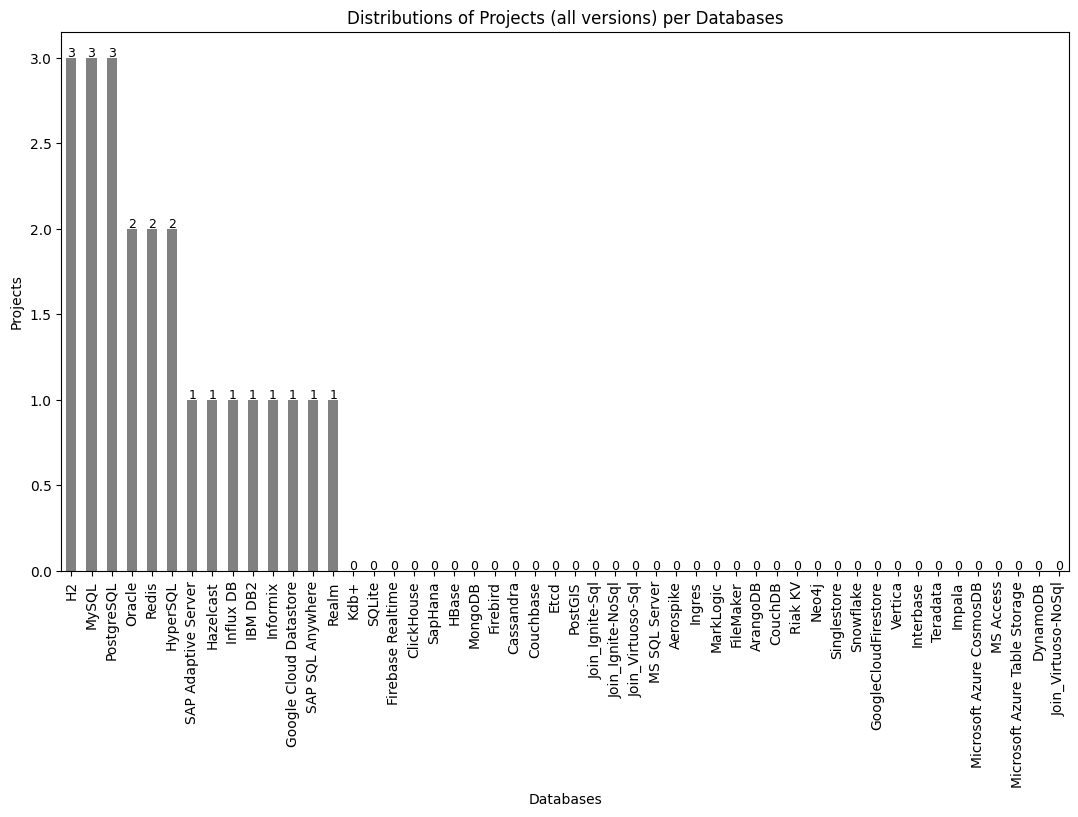

In [21]:
plt.figure(figsize=(13,7))
plot = df2.iloc[: , 2:].apply(full_commits, axis=0).sort_values(ascending=False).plot(kind='bar', title = 'Distributions of Projects (all versions) per Databases', color='gray')
plt.xlabel("Databases")
plt.ylabel("Projects")
#plt.show()
for i in plot.patches:
    plot.annotate(i.get_height(),(i.get_x() + i.get_width() / 2, i.get_height()),
    ha='center', va='baseline', fontsize=9, color='black', xytext=(0, 1),textcoords='offset points')

Number of Projects in which there was an indication of use in some of the versions of projects by Database

In [22]:
def less_commits(x):
   #return sum(x/10)
   return sum(x % 10 != 0 )
df2.iloc[: , 2:].apply(less_commits, axis=0).sort_values(ascending=False)

MySQL                            123
H2                                96
PostgreSQL                        91
Oracle                            83
Redis                             79
HyperSQL                          74
MS SQL Server                     62
MongoDB                           45
Google Cloud Datastore            39
IBM DB2                           38
SQLite                            38
Hazelcast                         31
Cassandra                         30
DynamoDB                          29
SAP SQL Anywhere                  22
HBase                             22
SAP Adaptive Server               21
Neo4j                             17
Firebird                          14
MS Access                         13
Informix                          13
PostGIS                           11
Teradata                          10
SapHana                           10
MarkLogic                         10
Snowflake                          9
ClickHouse                         9
F

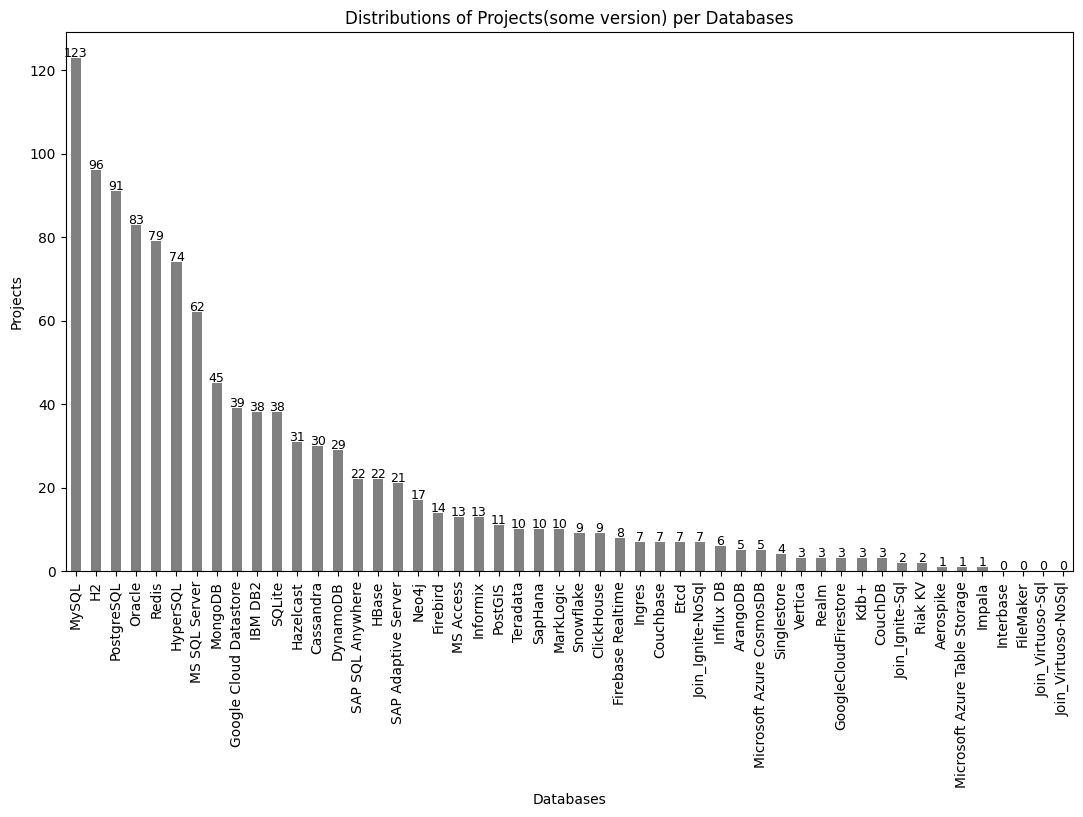

In [23]:
plt.figure(figsize=(13,7))
plot = df2.iloc[: , 2:].apply(less_commits, axis=0).sort_values(ascending=False).plot(kind='bar', title = 'Distributions of Projects(some version) per Databases', color = 'gray')
plt.xlabel("Databases")
plt.ylabel("Projects")
#plt.show() 
for i in plot.patches:
    plot.annotate(i.get_height(),(i.get_x() + i.get_width() / 2, i.get_height()),
    ha='center', va='baseline', fontsize=9, color='black', xytext=(0, 1),textcoords='offset points')

# TODO: Eu (Joao) parei de ajustar aqui

In [24]:
dfteste = pd.read_excel(RESOURCE_DIR + os.sep +'historical_join_db.xlsx', keep_default_na=False)
dfteste['NonZeroCount'] = (dfteste.iloc[: , 4:366] != 0).sum(axis=1)
dfteste

,Databases,Primary Model,Second Model,Model,Activiti,Android-IMSI-Catcher-Detector,AndroidUtilCode,AntennaPod,AnySoftKeyboard,Apktool,...,xxl-job,yacy_search_server,zaproxy,zeppelin,zipkin,zookeeper,zxing,zxing-android-embedded,Projects,NonZeroCount
0,Aerospike,Key-value,Multi-model,NoSQL,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,ArangoDB,Multi-Model,,NoSQL,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,5
2,Cassandra,Wide column,,NoSQL,0,0,0,0,0,0,...,0,0,0,38,25,0,0,0,31,31
3,ClickHouse,Relational,Multi-model,SQL,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,11,11
4,Couchbase,Document,Multi-model,NoSQL,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,9
5,CouchDB,Document,Multi-model,NoSQL,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,3
6,DynamoDB,Multi-model,,NoSQL,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,33,33
7,Etcd,Key-value,,NoSQL,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,8
8,FileMaker,Relational,,SQL,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Firebase Realtime,Document,,NoSQL,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,8


In [25]:
df3 = pd.read_excel(RESOURCE_DIR + os.sep +'historical_join_db.xlsx', keep_default_na=False)
#df3 = pd.read_excel(RESOURCE_DIR + os.sep +'historical_join_db (1).xlsx', keep_default_na=False)
#df3['Projects'] = df3.iloc[: , 4:].sum(axis=0)
df3
#A raquel faz uma soma (contagem de celulas maior que 1) no final do arquivo, fazer a soma tmb. Chamar a coluna de Projects

,Databases,Primary Model,Second Model,Model,Activiti,Android-IMSI-Catcher-Detector,AndroidUtilCode,AntennaPod,AnySoftKeyboard,Apktool,...,wildfly,xxl-job,yacy_search_server,zaproxy,zeppelin,zipkin,zookeeper,zxing,zxing-android-embedded,Projects
0,Aerospike,Key-value,Multi-model,NoSQL,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,ArangoDB,Multi-Model,,NoSQL,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
2,Cassandra,Wide column,,NoSQL,0,0,0,0,0,0,...,0,0,0,0,38,25,0,0,0,31
3,ClickHouse,Relational,Multi-model,SQL,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
4,Couchbase,Document,Multi-model,NoSQL,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
5,CouchDB,Document,Multi-model,NoSQL,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
6,DynamoDB,Multi-model,,NoSQL,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,33
7,Etcd,Key-value,,NoSQL,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
8,FileMaker,Relational,,SQL,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Firebase Realtime,Document,,NoSQL,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8


In [26]:

df3['Model'].replace({'SQL': 'Relational'}, regex=True, inplace=True)
df3['Model'].replace({'NoRelational': 'Non Relational'}, regex=True, inplace=True)
#df3.set_index(list(df.columns[[4]]))
#df3['Projects'] = (df3.loc[4:] > 0).count()
#print(df.iloc[:,4:]) #df3[df3.iloc [:,4:] >0].count()
df3
historical_join_db = df3.copy()


In [27]:
df3

,Databases,Primary Model,Second Model,Model,Activiti,Android-IMSI-Catcher-Detector,AndroidUtilCode,AntennaPod,AnySoftKeyboard,Apktool,...,wildfly,xxl-job,yacy_search_server,zaproxy,zeppelin,zipkin,zookeeper,zxing,zxing-android-embedded,Projects
0,Aerospike,Key-value,Multi-model,Non Relational,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,ArangoDB,Multi-Model,,Non Relational,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
2,Cassandra,Wide column,,Non Relational,0,0,0,0,0,0,...,0,0,0,0,38,25,0,0,0,31
3,ClickHouse,Relational,Multi-model,Relational,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
4,Couchbase,Document,Multi-model,Non Relational,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
5,CouchDB,Document,Multi-model,Non Relational,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
6,DynamoDB,Multi-model,,Non Relational,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,33
7,Etcd,Key-value,,Non Relational,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
8,FileMaker,Relational,,Relational,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Firebase Realtime,Document,,Non Relational,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8


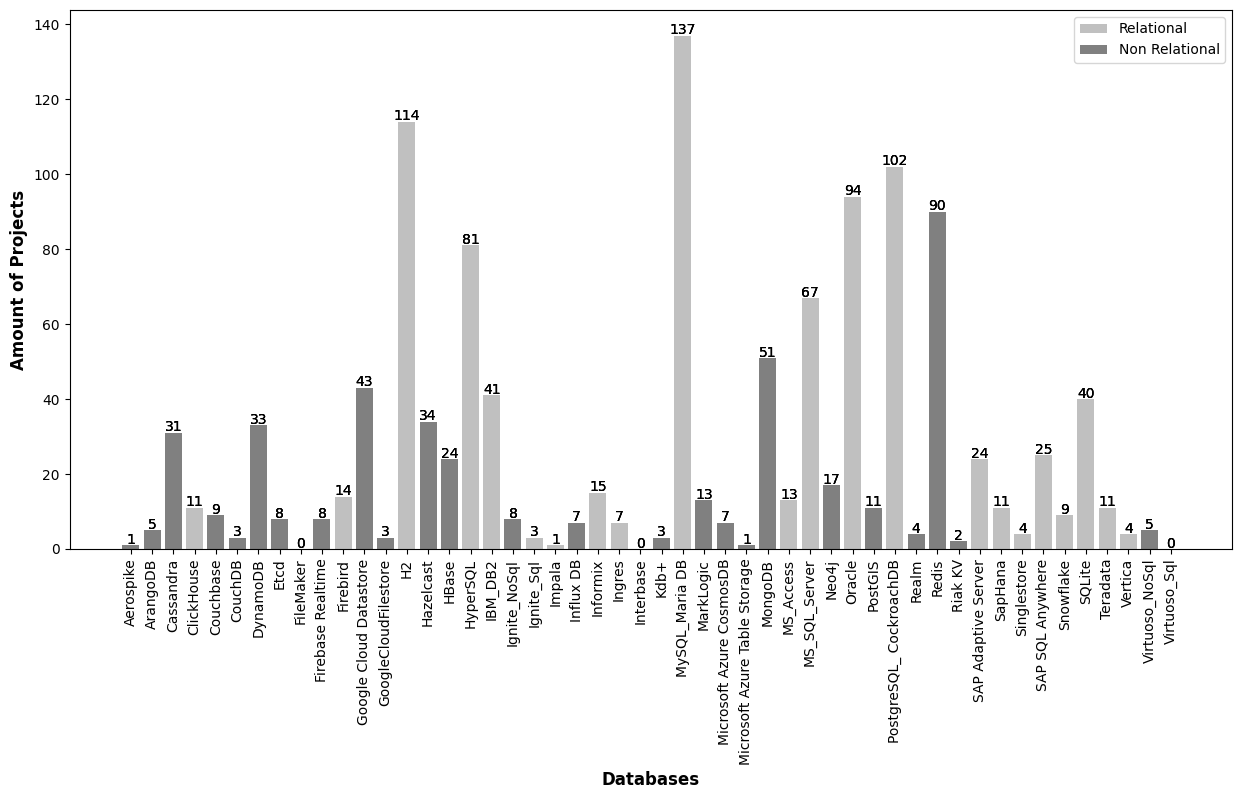

In [28]:
colors = {'Relational':'silver','Non Relational':'gray'}
c = df3['Model'].apply(lambda x: colors[x])

plt.figure(figsize=(15,7))
ax = plt.subplot(111) #specify a subplot

bars = ax.bar(df3['Databases'], df3['Projects'], color=c ) #Plot data on subplot axis
#plot = df3.plot(kind='bar', x ='Databases', y ='Projects', title = 'Distributions of Projects per Databases', color=c)
for i, j in colors.items(): #Loop over color dictionary
    ax.bar(df3['Databases'], df3['Projects'],width=0,color=j,label=i) #Plot invisible bar graph but have the legends specified

plt.xlabel("Databases", fontweight = 'bold', fontsize=12)
plt.ylabel("Amount of Projects", fontweight = 'bold', fontsize=12)
#plt.title('Distributions of Projects per Databases classify by Models')
ax.legend()
plt.xticks(rotation=90)
#plt.show()
for i in ax.patches:
    ax.annotate(i.get_height(),(i.get_x() + i.get_width() / 2, i.get_height()),
    ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 1),textcoords='offset points')

#plt.savefig(IMAGES_DIR+"/fig9.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [29]:
renomeacoes = {
    'MySQL_Maria DB': 'MySQL',
    'PostgreSQL_ CockroachDB': 'PostgreSQL',
    'MS SQL Server_Microsoft Azure SQL Database': 'MS SQL Server',
    'MS_SQL_Server': 'MS SQL Server',
    'IBM_DB2': 'IBM DB2',
    'Virtuoso_NoSql': 'Virtuoso-NoSql',
    'Virtuoso_Sql': 'Virtuoso-Sql',
    'Ignite_NoSql': 'Ignite-NoSql',
    'Ignite_Sql': 'Ignite-Sql',
    'GoogleCloudFilestore': 'GoogleCloudFirestore',
}

# Renomeando os valores na coluna 'banco_de_dados'
df3['Databases'] = df3['Databases'].replace(renomeacoes)



/var/folders/kc/q64njxfx5xj09h4nrxwncwbw0000gn/T/ipykernel_44588/579949265.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['Amount of Projects'] = df5['Relational'] + df5['Non Relational']


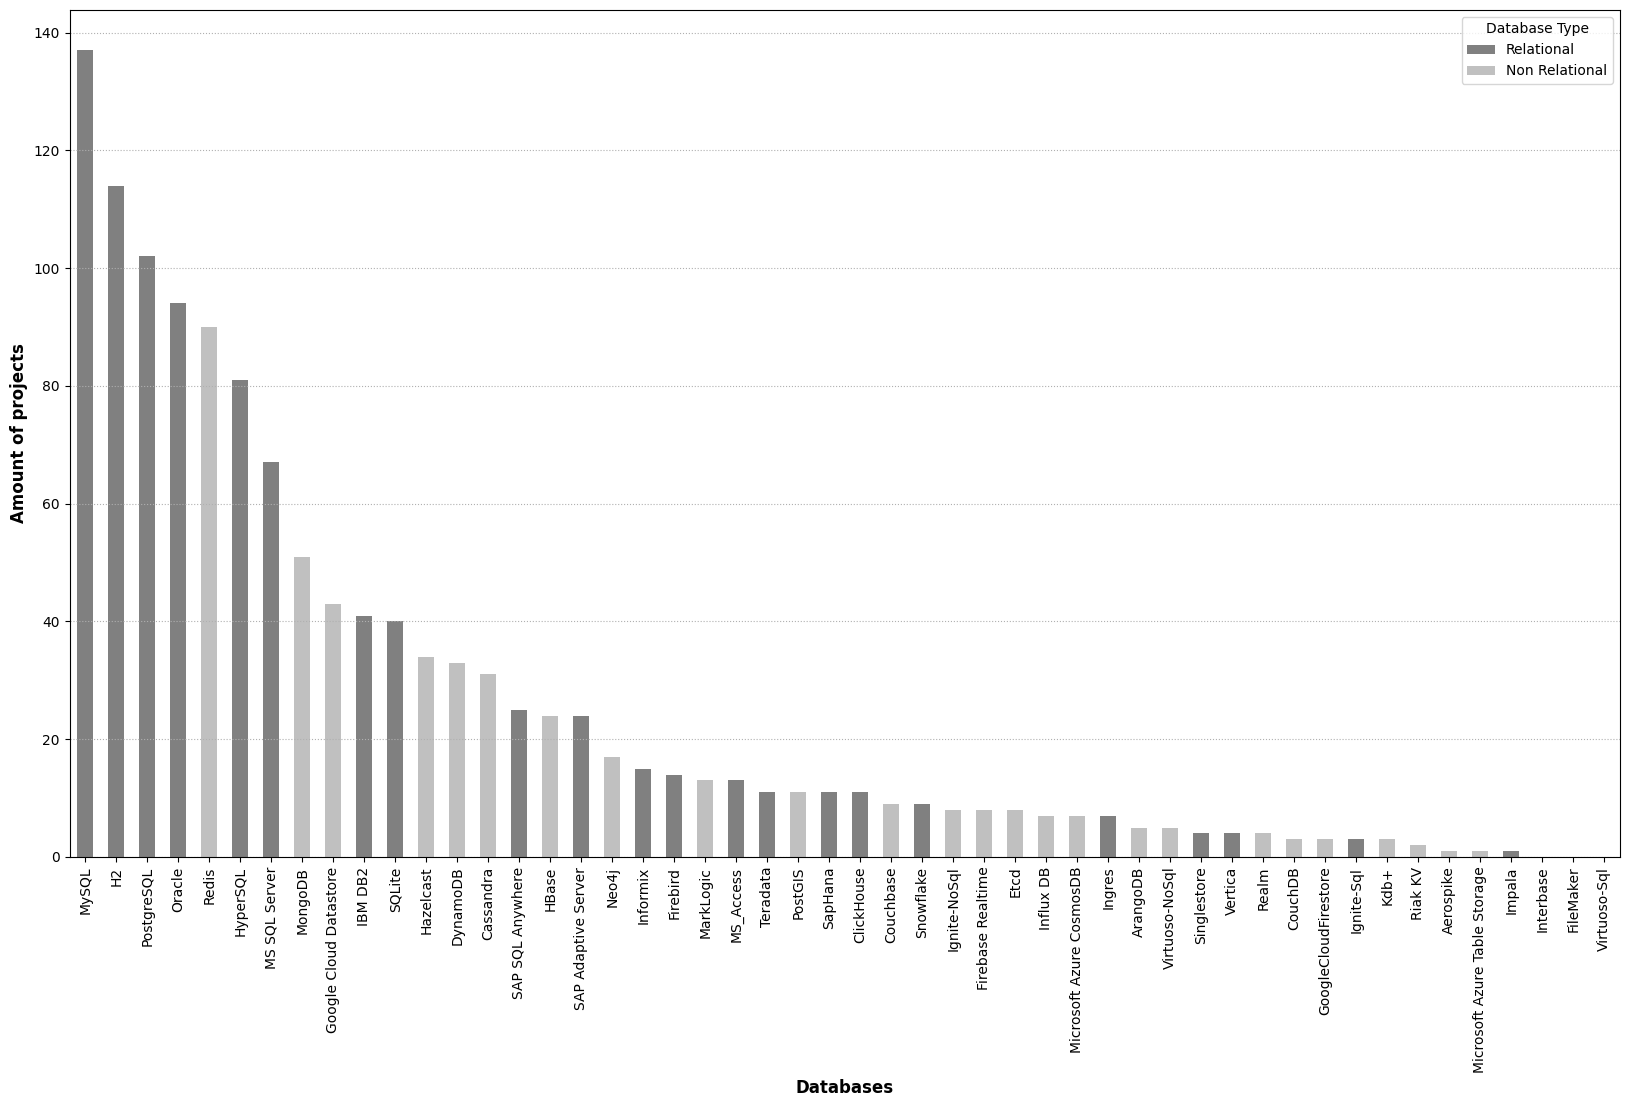

In [30]:
new_df = df3.copy()

# Supondo que seu DataFrame seja chamado df
df_grouped = new_df.groupby(['Databases'])['Projects'].sum().reset_index()

# Agrupando novamente para separar 'Relational' e 'Non_Relational'
df_grouped = new_df.groupby(['Databases', 'Model'])['Projects'].sum().reset_index()


# Criando a coluna 'Relational' e 'Non_Relational'
df_grouped['Relational'] = df_grouped.apply(lambda row: row['Projects'] if row['Model'] == 'Relational' else 0, axis=1)
df_grouped['Non Relational'] = df_grouped.apply(lambda row: row['Projects'] if row['Model'] == 'Non Relational' else 0, axis=1)

df_grouped = df_grouped.reset_index(drop=True)


# Cirando um novo df para facilitar a criação do gráfico
df5 = df_grouped[['Databases', 'Relational', 'Non Relational']]

df5['Amount of Projects'] = df5['Relational'] + df5['Non Relational']

df5 = df5.sort_values(by='Amount of Projects', ascending=False)

# Definindo a paleta de cores
plt.rc('axes', prop_cycle=plt.cycler('color', ['gray', 'silver']))

ax = df5.plot(x='Databases', y=['Relational', 'Non Relational'], kind='bar', stacked=True, figsize=(20,11))

# Personalizando o gráfico
ax.set_xlabel("Databases", fontsize=12, fontweight = 'bold')
ax.set_ylabel("Amount of projects", fontsize=12, fontweight = 'bold')
#Incluído para mostrar os valores das barras
ax.legend(title="Database Type")
#ticks = ['']
#plt.xticks(y, ticks)
plt.xticks(rotation=90)
#plt.show()
#for i in ax.patches:
#    if i.get_height() != 0:
#        ax.annotate(int(i.get_height()),(i.get_x() + i.get_width() / 2, i.get_height()),
#        ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 1),textcoords='offset points')

plt.grid(axis='y', linestyle=':', linewidth=0.8)

plt.savefig(IMAGES_DIR+"/projects_databases_models2.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [31]:
soma_colunas = df3.iloc[:, 4:366].sum()

# Conta quantas colunas têm valor maior que 0 na soma
colunas_maior_que_zero = (soma_colunas > 0).sum()
colunas_zeradas = (soma_colunas == 0).sum()

print("Soma de cada coluna:\n", soma_colunas)
print("\nQuantidade de colunas com valor maior que 0:", colunas_maior_que_zero)
print("\nQuantidade de colunas com valor 0:", colunas_zeradas)

Soma de cada coluna:
 Activiti                         313
Android-IMSI-Catcher-Detector      3
AndroidUtilCode                    0
AntennaPod                         0
AnySoftKeyboard                    2
                                ... 
zeppelin                         365
zipkin                            51
zookeeper                          4
zxing                              0
zxing-android-embedded             0
Length: 362, dtype: int64

Quantidade de colunas com valor maior que 0: 234

Quantidade de colunas com valor 0: 128


This dataframe shows the databases that remained and those that left. It was generated from the filter run in the Pattern counter tool with the following command: $patterncounter convert -f input_sequencial_init_in_out.txt | patterncounter count --csv -n "OutX" -v X + "X ~OutX" -v X + '$X' -v X >> countpatterns_OutX_notOutx_Xlastslice.csv

Out X -> Filters out the BDs that have left
$X -> Filters the Bds that remained in the last slice despite removals and reinsertions
~Out X -> Filters out the DBs that have not left.

OBS: Na data atual, 13/11/24, o Pattern counter tem um bug e consegus buscar os itens usando o comando: "~OutX". Usar o comando: "X ~OutX".

In [71]:
df4 = pd.read_excel(HISTORICAL_DB_KEEP_OUT, keep_default_na=False) #esta parte não esta atualizada, não alterei este arquivo: HISTORICAL_DB_KEEP_OUT
len(df4)
df4

,Databases,Source,Lines
0,MS SQL Server,OutX -v X,18
1,IBM DB2,OutX -v X,14
2,H2,OutX -v X,32
3,HyperSQL,OutX -v X,33
4,SAPSQLAnywhere,OutX -v X,12
...,...,...,...
124,Aerospike,$X -v X,1
125,SapHana,$X -v X,9
126,Impala,$X -v X,1
127,Join_Ignite_Sql,$X -v X,2


In [72]:
df4['Source'].replace({'OutX -v X':'Removed'}, regex=True, inplace=True)
#df4['Source'].replace({'Removed': 'Kept'}, regex=True, inplace=True)
df4

,Databases,Source,Lines
0,MS SQL Server,Removed,18
1,IBM DB2,Removed,14
2,H2,Removed,32
3,HyperSQL,Removed,33
4,SAPSQLAnywhere,Removed,12
...,...,...,...
124,Aerospike,$X -v X,1
125,SapHana,$X -v X,9
126,Impala,$X -v X,1
127,Join_Ignite_Sql,$X -v X,2


In [73]:
#df5 = df.copy()
df5 = df4.query("Source != '$X -v X'")
df5['Source'].replace({'~Removed': 'Kept'}, regex=True, inplace=True)
df5

/var/folders/kc/q64njxfx5xj09h4nrxwncwbw0000gn/T/ipykernel_44588/2473066294.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['Source'].replace({'~Removed': 'Kept'}, regex=True, inplace=True)


,Databases,Source,Lines
0,MS SQL Server,Removed,18
1,IBM DB2,Removed,14
2,H2,Removed,32
3,HyperSQL,Removed,33
4,SAPSQLAnywhere,Removed,12
...,...,...,...
77,Kdb,Kept,3
78,SapHana,Kept,8
79,Impala,Kept,1
80,Join_Ignite_Sql,Kept,2


In [74]:
df5.rename(columns={'Lines': 'Amount of Projects', 'Source':'Legend'}, inplace=True)

df5

/var/folders/kc/q64njxfx5xj09h4nrxwncwbw0000gn/T/ipykernel_44588/2910628385.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5.rename(columns={'Lines': 'Amount of Projects', 'Source':'Legend'}, inplace=True)


,Databases,Legend,Amount of Projects
0,MS SQL Server,Removed,18
1,IBM DB2,Removed,14
2,H2,Removed,32
3,HyperSQL,Removed,33
4,SAPSQLAnywhere,Removed,12
...,...,...,...
77,Kdb,Kept,3
78,SapHana,Kept,8
79,Impala,Kept,1
80,Join_Ignite_Sql,Kept,2


In [75]:
df5 = df5.sort_values(['Amount of Projects'], ascending=[False])
#df5 = df5.groupby(['Databases','Legend']).mean().sort_values(['Amount of Projects',], ascending=[False])
df5

,Databases,Legend,Amount of Projects
42,MySQL,Kept,96
39,H2,Kept,82
46,PostgreSQL,Kept,77
44,Oracle,Kept,71
50,Redis,Kept,68
...,...,...,...
20,PostGIS,Removed,1
23,MarkLogic,Removed,1
35,Aerospike,Removed,1
30,ArangoDB,Removed,1


In [76]:
#df5.rename(columns={'Lines': 'Amount of Projects', 'Source':'Legend'}, inplace=True)
df5['Databases'].replace({'Join_Ignite': 'Ignite'}, regex=True, inplace=True)
df5['Databases'].replace({'GoogleCloudFilestore': 'GoogleCloudFirestore'}, regex=True, inplace=True)

This graph shows the databases that remained despite removals and reinsertions and the databases that left.

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

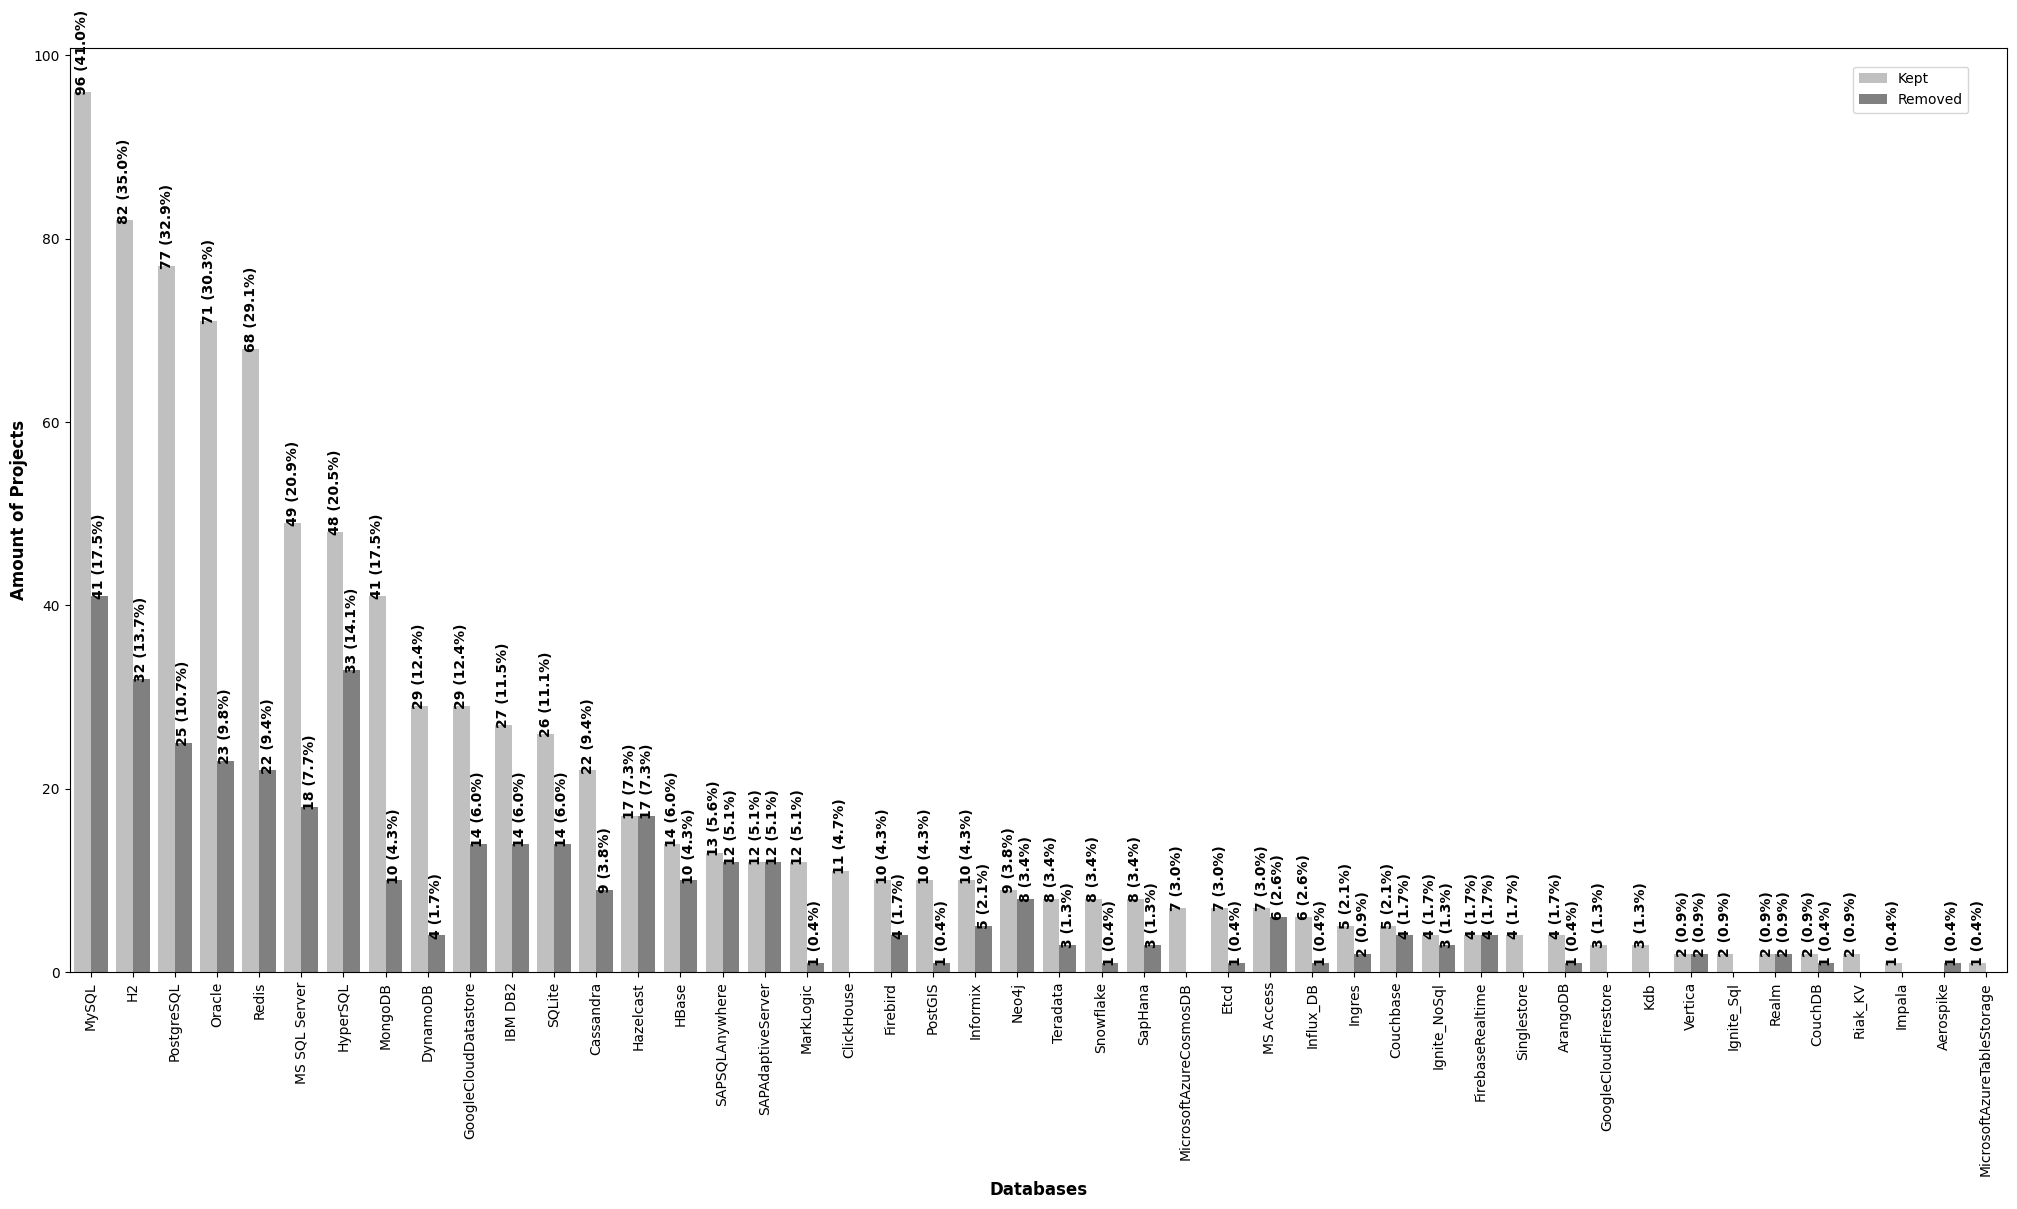

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

sizeCorus = 234

plt.figure(figsize=(25, 12))

def show_values_on_bars(axs):
    def _show_on_single_plot(ax):
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            height = p.get_height()
            percent = 100 * height / sizeCorus
            #value = '{:.1f}'.format(percent)
            value = '{:.0f} ({:.1f}%)'.format(height, percent)
            ax.text(_x, _y, value, ha="center", fontsize = 10, fontweight='bold', rotation=90)

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
        
        
# create grouped bar chart
p = sns.barplot(x='Databases', y='Amount of Projects', hue='Legend', data=df5, palette=["Silver", "gray"])

# add axis titles
plt.xlabel('Databases', fontsize=12, fontweight='bold')
plt.ylabel('Amount of Projects', fontsize=12, fontweight='bold')

# add values to bars
show_values_on_bars(p)

# add legend
plt.legend(bbox_to_anchor=(0.98, 0.98), loc='upper right', borderaxespad=0.)

# rotate x-axis labels
plt.xticks(rotation=90)
#plt.yticks(range(0, 30, 10), fontsize=12)

plt.savefig(IMAGES_DIR+"/projects_keptandremoved3.pdf", format="pdf", bbox_inches="tight")
# show plot
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

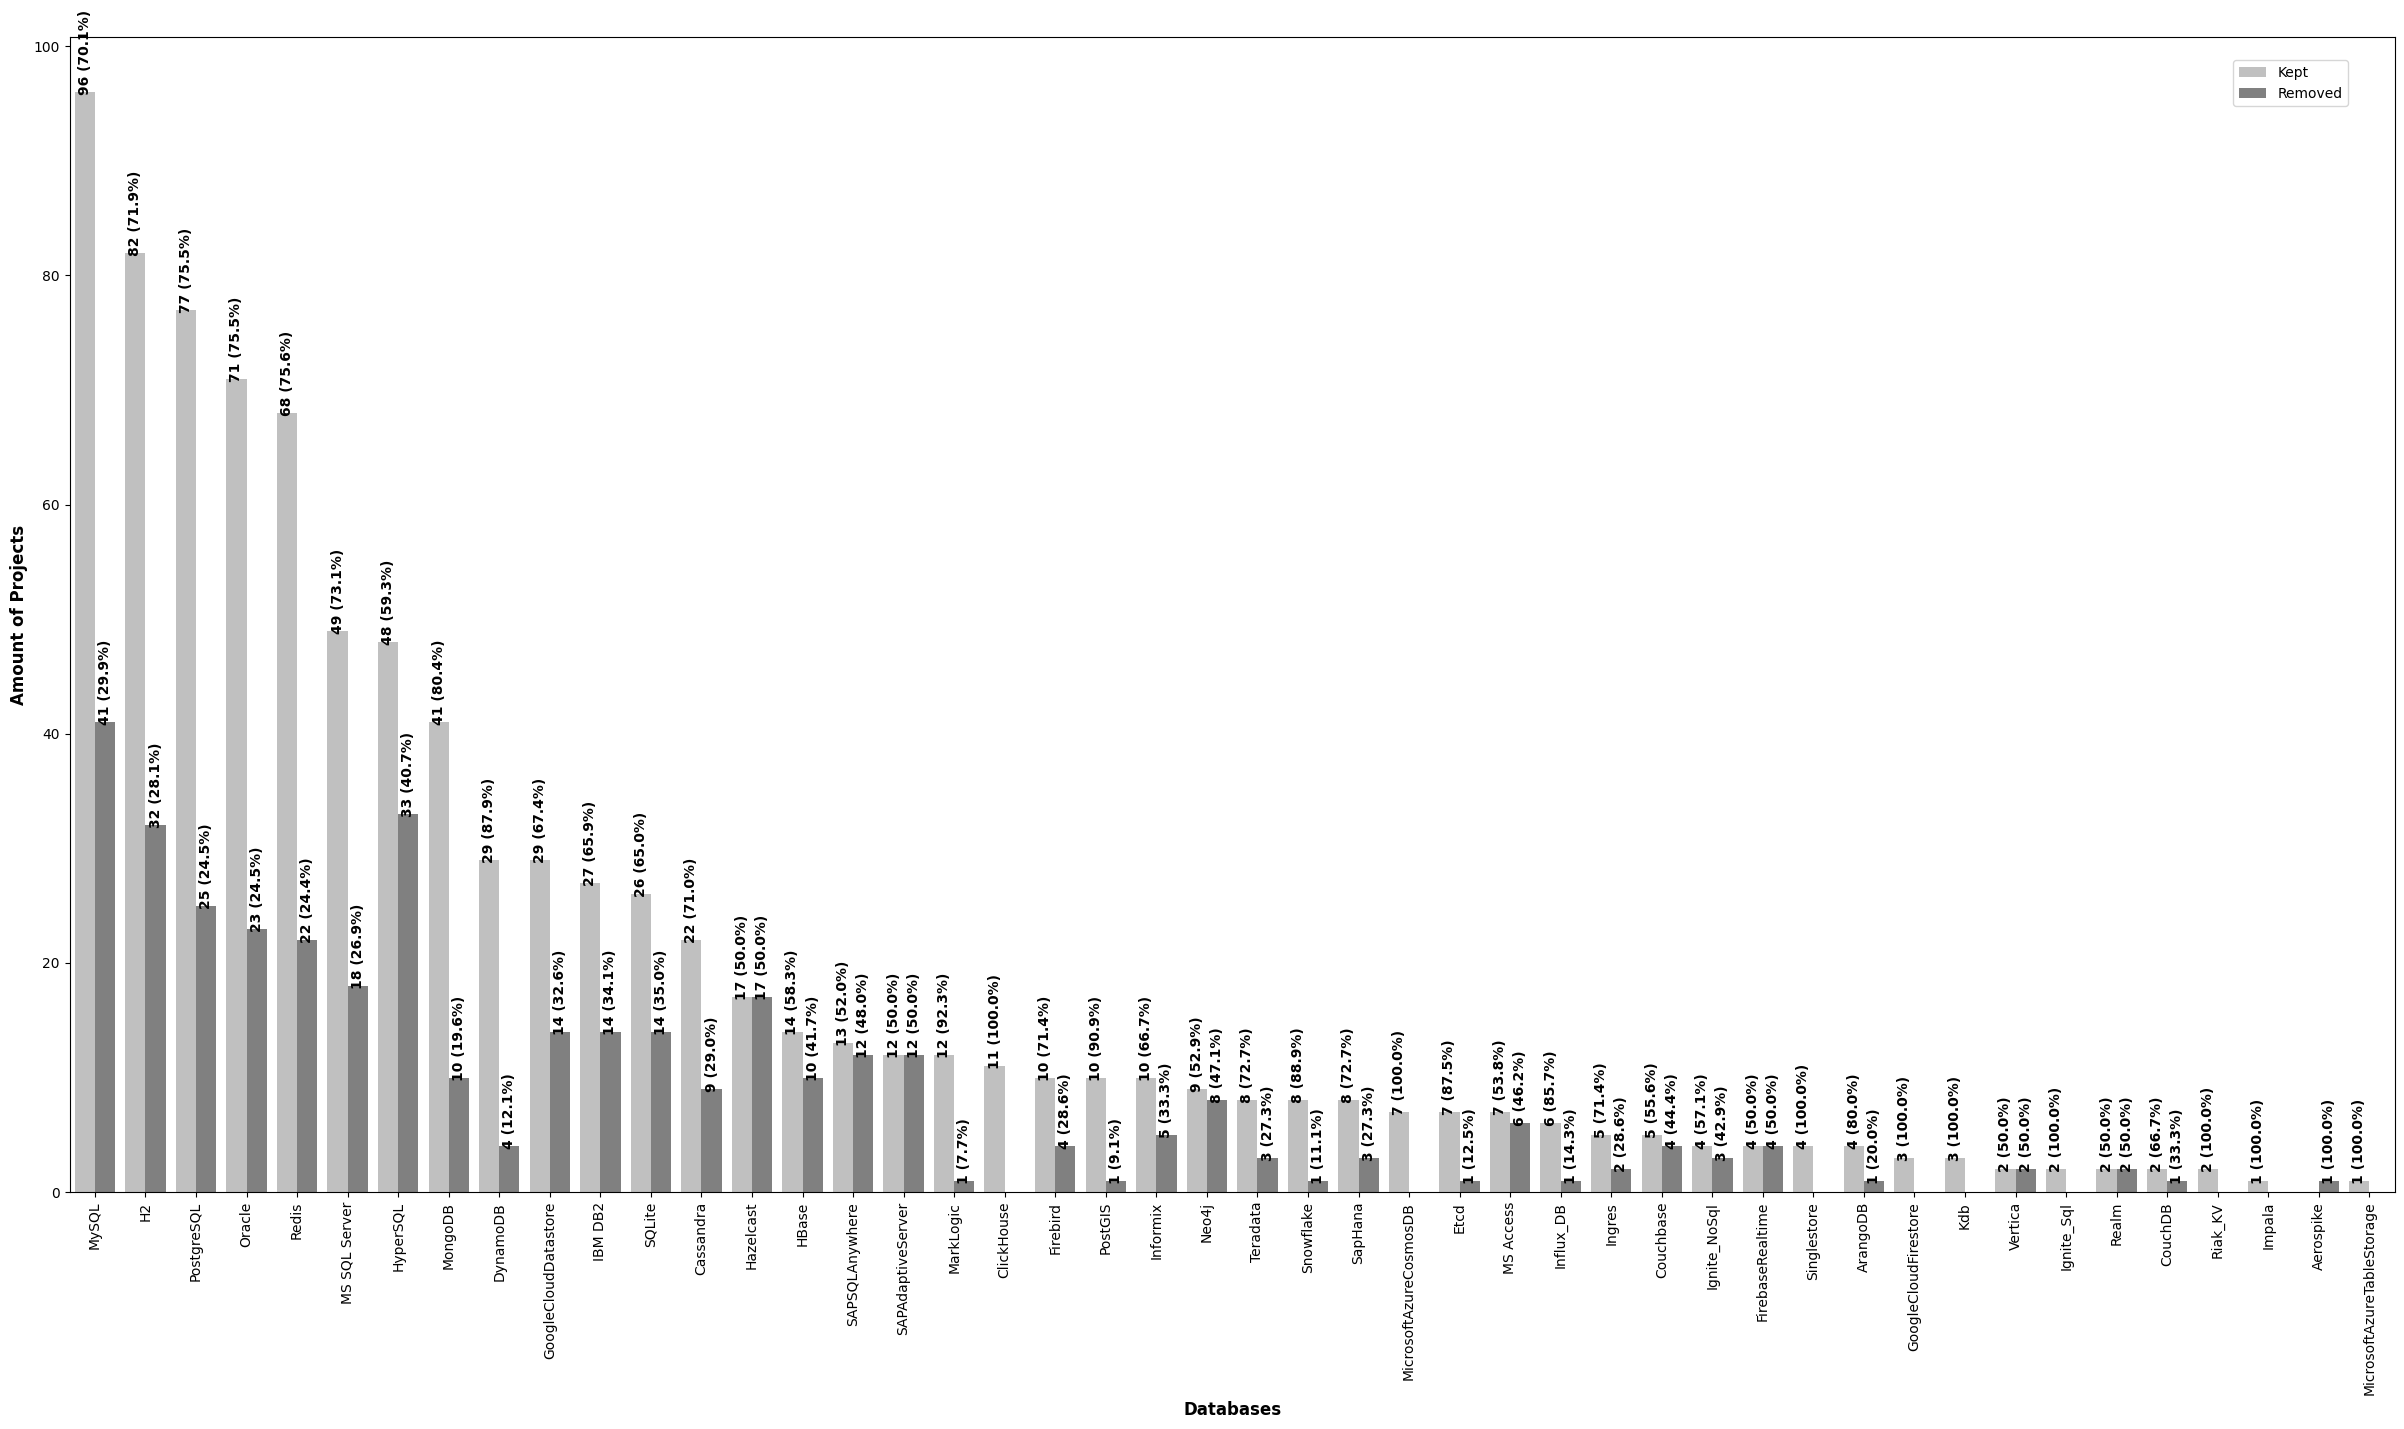

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Exemplo de DataFrame (ajuste conforme seus dados)

plt.figure(figsize=(30, 15))

def show_values_on_bars(axs, df):
    def _show_on_single_plot(ax):
        # Iterar sobre as barras
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2  # Posição no eixo X (meio da barra)
            _y = p.get_y() + p.get_height()  # Posição Y para a colocação do texto
            height = p.get_height()

            # Obter o nome do banco de dados (Databases) a partir do eixo X
            label = p.get_x()  # Posição no eixo X (deve ser o nome do banco de dados)
            
            # Associar a posição do eixo X com o nome do banco
            # Agora, estamos usando o valor da coluna 'Databases' para pegar o nome correto
            #xticklabels = [tick.get_text() for tick in ax.get_xticklabels()]
            #label = xticklabels[int(label)]

            # Supondo que os rótulos do eixo X correspondem a um intervalo de índices
            xticklabels = [tick.get_text() for tick in ax.get_xticklabels()]

            # Se p.get_x() não for um índice exato, podemos fazer uma busca pelo valor mais próximo
            x_pos = p.get_x()

            # Encontrar o índice mais próximo
            closest_idx = min(range(len(xticklabels)), key=lambda i: abs(x_pos - i))

            # Agora, podemos usar o índice para pegar o nome correspondente
            label = xticklabels[closest_idx]

            
            #database_name = df['Databases'].iloc[int(label)].replace(' ', '')  # Ajustar para garantir que não há espaços

            # Calcular o total para esse banco de dados (Removed + Kept)
            total_height = df[df['Databases'] == label]['Amount of Projects'].sum()

            # Verificação para evitar a divisão por zero
            if total_height == 0:
                percent = 0  # Se o total for zero, define o percentual como zero
            else:
                percent = 100 * height / total_height  # Calcula a porcentagem da barra

            # Formatar a exibição do valor: valor absoluto e percentual
            value = '{:.0f} ({:.1f}%)'.format(height, percent)
            ax.text(_x, _y, value, ha="center", fontsize=10, fontweight='bold', rotation=90)

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)


# Criar o gráfico de barras agrupadas
p = sns.barplot(x='Databases', y='Amount of Projects', hue='Legend', data=df5, palette=["Silver", "gray"])

# Adicionar títulos aos eixos
plt.xlabel('Databases', fontsize=12, fontweight='bold')
plt.ylabel('Amount of Projects', fontsize=12, fontweight='bold')

# Adicionar valores às barras
show_values_on_bars(p, df5)

# Adicionar legenda
plt.legend(bbox_to_anchor=(0.98, 0.98), loc='upper right', borderaxespad=0.)

# Rotacionar os rótulos do eixo X
plt.xticks(rotation=90)

# Salvar o gráfico em PDF
plt.savefig(IMAGES_DIR+"projects_keptandremoved3_v2.pdf", format="pdf", bbox_inches="tight")

# Exibir o gráfico
plt.show()


In [40]:
historical_join_db

,Databases,Primary Model,Second Model,Model,Activiti,Android-IMSI-Catcher-Detector,AndroidUtilCode,AntennaPod,AnySoftKeyboard,Apktool,...,wildfly,xxl-job,yacy_search_server,zaproxy,zeppelin,zipkin,zookeeper,zxing,zxing-android-embedded,Projects
0,Aerospike,Key-value,Multi-model,Non Relational,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,ArangoDB,Multi-Model,,Non Relational,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
2,Cassandra,Wide column,,Non Relational,0,0,0,0,0,0,...,0,0,0,0,38,25,0,0,0,31
3,ClickHouse,Relational,Multi-model,Relational,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
4,Couchbase,Document,Multi-model,Non Relational,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
5,CouchDB,Document,Multi-model,Non Relational,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
6,DynamoDB,Multi-model,,Non Relational,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,33
7,Etcd,Key-value,,Non Relational,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
8,FileMaker,Relational,,Relational,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Firebase Realtime,Document,,Non Relational,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8


In [41]:
result_databases_models = historical_join_db
organizing_per_model = result_databases_models.groupby(['Model']).sum()
organizing_per_model = organizing_per_model.mask(organizing_per_model > 0, True)
organizing_per_model = organizing_per_model.mask(organizing_per_model == 0, False)
organizing_per_model = organizing_per_model.transpose()
organizing_per_model = organizing_per_model.drop('Projects', axis = 0)
organizing_per_model = organizing_per_model.rename(columns={'Non Relational': 'NoSQL', 'Relational':'SQL'})
organizing_per_model

Model,NoSQL,SQL
Activiti,True,True
Android-IMSI-Catcher-Detector,True,False
AndroidUtilCode,False,False
AntennaPod,False,False
AnySoftKeyboard,False,True
...,...,...
zeppelin,True,True
zipkin,True,True
zookeeper,False,True
zxing,False,False


In [42]:
relational = pd.DataFrame(data = organizing_per_model.SQL)
nonRelational = pd.DataFrame(data = organizing_per_model.NoSQL)
relational.reset_index(inplace=True)
nonRelational.reset_index(inplace=True)

relational = relational.rename(columns={'index' : 'Projects'})
nonRelational = nonRelational.rename(columns={'index' : 'Projects'})

In [43]:
organizing_per_model

Model,NoSQL,SQL
Activiti,True,True
Android-IMSI-Catcher-Detector,True,False
AndroidUtilCode,False,False
AntennaPod,False,False
AnySoftKeyboard,False,True
...,...,...
zeppelin,True,True
zipkin,True,True
zookeeper,False,True
zxing,False,False


In [44]:
models_of_database_per_project = pd.merge(relational, nonRelational, left_on='Projects', right_on='Projects')

def identify_model (row):
    if (row['SQL'] and row['NoSQL']):
        return 'Multi-Model'
    else:
        if(row['SQL']):
            return 'Relational'
        if(row['NoSQL']):
            return 'NoSQL'

models_of_database_per_project['Models'] = models_of_database_per_project.apply(lambda row: identify_model(row), axis= 1)

models_of_database_per_project[models_of_database_per_project['Models'].isnull()] # Retira quem não tem modelo, por isso o valor fica menor.
models_of_database_per_project.dropna(subset=['Models'], inplace= True)
models_of_database_per_project.to_excel('modelsTeste.xlsx')
models_of_database_per_project

,Projects,SQL,NoSQL,Models
0,Activiti,True,True,Multi-Model
1,Android-IMSI-Catcher-Detector,False,True,NoSQL
4,AnySoftKeyboard,True,False,Relational
6,AsciidocFX,True,True,Multi-Model
7,AxonFramework,True,True,Multi-Model
...,...,...,...,...
355,yacy_search_server,True,True,Multi-Model
356,zaproxy,True,False,Relational
357,zeppelin,True,True,Multi-Model
358,zipkin,True,True,Multi-Model


In [45]:
from util import ANNOTATED_FILE_JAVA
annotated_java = pd.read_excel(ANNOTATED_FILE_JAVA)
characterization_of_projects = pd.merge(models_of_database_per_project, annotated_java, left_on='Projects', right_on='name', how="left")

characterization_of_projects = characterization_of_projects[characterization_of_projects['discardReason'].isna()]

characterization_of_projects

,Projects,SQL,NoSQL,Models,owner,name,createdAt,pushedAt,isMirror,diskUsage,...,commits,pullRequests,branches,tags,releases,url,description,isSoftware,discardReason,domain
0,Activiti,True,True,Multi-Model,Activiti,Activiti,2012-09-13 11:34:43,2019-08-23 12:02:11,False,95935.0,...,8458.0,1411.0,74.0,263.0,23.0,http://www.github.com/Activiti/Activiti,Activiti is a light-weight workflow and Busine...,Y,NaN,Enterprise Resource Planning
1,Android-IMSI-Catcher-Detector,False,True,NoSQL,CellularPrivacy,Android-IMSI-Catcher-Detector,2013-11-23 10:04:14,2019-08-13 15:22:57,False,10897.0,...,2583.0,344.0,6.0,49.0,48.0,http://www.github.com/CellularPrivacy/Android-...,"AIMSICD • Fight IMSI-Catcher, StingRay and sil...",Y,NaN,Security
2,AnySoftKeyboard,True,False,Relational,AnySoftKeyboard,AnySoftKeyboard,2012-04-18 12:38:01,2019-08-21 16:43:46,False,131594.0,...,4558.0,556.0,15.0,93.0,41.0,http://www.github.com/AnySoftKeyboard/AnySoftK...,Android (f/w 2.1+) on screen keyboard for mult...,Y,NaN,Other
3,AsciidocFX,True,True,Multi-Model,asciidocfx,AsciidocFX,2014-05-18 17:49:13,2019-08-05 22:55:08,False,145073.0,...,1566.0,53.0,29.0,73.0,73.0,http://www.github.com/asciidocfx/AsciidocFX,Asciidoc Editor and Toolchain written with Jav...,Y,NaN,Media
4,AxonFramework,True,True,Multi-Model,AxonFramework,AxonFramework,2011-12-02 16:04:42,2019-08-16 09:58:53,False,29173.0,...,5359.0,512.0,15.0,101.0,62.0,http://www.github.com/AxonFramework/AxonFramework,Framework for Evolutionary Event-Driven Micros...,Y,NaN,Infrastructure Management
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,yacy_search_server,True,True,Multi-Model,yacy,yacy_search_server,2015-03-22 12:54:20,2019-07-17 07:36:46,False,742164.0,...,13922.0,92.0,1.0,20.0,0.0,http://www.github.com/yacy/yacy_search_server,Distributed Peer-to-Peer Web Search Engine and...,Y,NaN,Infrastructure Management
232,zaproxy,True,False,Relational,zaproxy,zaproxy,2015-06-03 16:55:01,2019-08-22 07:24:00,False,181083.0,...,6980.0,2103.0,3.0,227.0,124.0,http://www.github.com/zaproxy/zaproxy,The OWASP ZAP core project,Y,NaN,Security
233,zeppelin,True,True,Multi-Model,apache,zeppelin,2015-03-25 07:00:06,2019-08-23 08:18:53,True,75180.0,...,4154.0,3429.0,11.0,15.0,0.0,http://www.github.com/apache/zeppelin,Mirror of Apache Zeppelin,Y,NaN,Data Management
234,zipkin,True,True,Multi-Model,openzipkin,zipkin,2012-06-06 18:26:16,2019-08-23 11:36:31,False,48583.0,...,2134.0,1728.0,41.0,184.0,53.0,http://www.github.com/openzipkin/zipkin,Zipkin is a distributed tracing system,Y,NaN,Monitoring


In [46]:
result = characterization_of_projects.loc[characterization_of_projects['name'].str.contains('android', case=False, na=False)]
#characterization_of_projects.drop(characterization_of_projects.index[34], inplace= True)
result
#tem um projeto a mais

,Projects,SQL,NoSQL,Models,owner,name,createdAt,pushedAt,isMirror,diskUsage,...,commits,pullRequests,branches,tags,releases,url,description,isSoftware,discardReason,domain
1,Android-IMSI-Catcher-Detector,False,True,NoSQL,CellularPrivacy,Android-IMSI-Catcher-Detector,2013-11-23 10:04:14,2019-08-13 15:22:57,False,10897.0,...,2583.0,344.0,6.0,49.0,48.0,http://www.github.com/CellularPrivacy/Android-...,"AIMSICD • Fight IMSI-Catcher, StingRay and sil...",Y,NaN,Security
14,MPAndroidChart,False,True,NoSQL,PhilJay,MPAndroidChart,2014-04-25 14:29:47,2019-08-22 16:38:30,False,21264.0,...,2018.0,413.0,6.0,44.0,44.0,http://www.github.com/PhilJay/MPAndroidChart,A powerful 🚀 Android chart view / graph view l...,Y,NaN,Software Development
23,Signal-Android,False,True,NoSQL,signalapp,Signal-Android,2011-12-15 20:01:12,2019-08-23 14:12:42,False,200886.0,...,4427.0,2072.0,166.0,478.0,0.0,http://www.github.com/signalapp/Signal-Android,A private messenger for Android.,Y,NaN,Security
32,android,True,False,Relational,cSploit,android,2014-10-04 05:53:29,2019-08-06 18:27:22,False,39599.0,...,1403.0,146.0,10.0,38.0,33.0,http://www.github.com/cSploit/android,cSploit - The most complete and advanced IT se...,Y,NaN,Security
33,android,True,False,Relational,nextcloud,android,2016-06-06 21:23:36,2019-08-23 08:20:12,False,378332.0,...,13282.0,1916.0,30.0,222.0,102.0,http://www.github.com/nextcloud/android,📱 Nextcloud Android app,Y,NaN,File Management
76,firebase-android-sdk,False,True,NoSQL,firebase,firebase-android-sdk,2018-08-31 20:50:43,2021-03-26 08:25:26,False,20767.0,...,1215.0,1677.0,282.0,0.0,0.0,http://www.github.com/firebase/firebase-androi...,Firebase Android SDK,Y,NaN,Software Development
173,pslab-android,False,True,NoSQL,fossasia,pslab-android,2017-03-28 16:03:15,2019-08-22 20:57:05,False,18129.0,...,1044.0,972.0,3.0,18.0,18.0,http://www.github.com/fossasia/pslab-android,PSLab Android App https://play.google.com/stor...,Y,NaN,Other


In [47]:
import pandas as pd
from util import ANNOTATED_FILE_JAVA_COMPLET


# Verificar quais itens da coluna 'name' em df1 estão presentes na coluna 'projects' de df2
itens_presentes = characterization_of_projects['Projects'].isin(models_of_database_per_project['Projects'])
#historical_join_db.iloc[1:1,4:366])

# Exibir o resultado: True para os itens que estão presentes, False para os que estão faltando
#print(itens_presentes)

# Filtrar os itens que estão presentes
nomes_presentes = characterization_of_projects[itens_presentes]
#print("Itens presentes em ambas as colunas:")
#print(nomes_presentes)

# Filtrar os itens que estão faltando
nomes_faltando = characterization_of_projects[~itens_presentes]
#print("\nItens da coluna 'name' que estão faltando em 'projects':")
#print(nomes_faltando)

# Converter as colunas para sets
names_set = set(models_of_database_per_project['Projects'])
projects_set = set(characterization_of_projects['Projects'])

# Verificar se os conjuntos são iguais
if names_set == projects_set:
    print("Os itens nas colunas 'name' e 'projects' são os mesmos (em termos de valores).")
else:
    print("As colunas 'name' e 'projects' têm valores diferentes.")
    
# Itens presentes em 'name' mas não em 'projects'
names_faltando = names_set - projects_set
print("\nItens presentes em 'name' mas não em 'projects':", names_faltando)

# Itens presentes em 'projects' mas não em 'name'
projects_faltando = projects_set - names_set
print("Itens presentes em 'projects' mas não em 'name':", projects_faltando)

if len(models_of_database_per_project['Projects']) == len(characterization_of_projects['Projects']):
    print("\nAs quantidades de itens nas colunas 'name' e 'projects' são iguais.")
else:
    print("\nAs quantidades de itens nas colunas 'name' e 'projects' são diferentes.")

duplicados_projects = characterization_of_projects['Projects'].duplicated(keep=False)

# Filtrar os projetos duplicados
projetos_duplicados = characterization_of_projects.loc[duplicados_projects, 'name'].unique()

if len(projetos_duplicados) > 0:
    print(f"\nProjetos duplicados: {', '.join(projetos_duplicados)}")
else:
    print("\nNão existem itens duplicados na coluna 'projects'.")

Os itens nas colunas 'name' e 'projects' são os mesmos (em termos de valores).

Itens presentes em 'name' mas não em 'projects': set()
Itens presentes em 'projects' mas não em 'name': set()

As quantidades de itens nas colunas 'name' e 'projects' são diferentes.

Projetos duplicados: android


In [48]:
characterization_of_projects['domain'] = characterization_of_projects['domain'].str.replace('infrastructure Management', 'Infrastructure Management')

characterization_of_projects['domain'] = characterization_of_projects['domain'].str.replace('Artificial Intelligence ', 'Artificial Intelligence')


In [49]:
characterization_of_projects['domain'].value_counts()

Data Management                 59
Software Development            53
Infrastructure Management       27
Security                        14
Program Analysis                12
Monitoring                      11
Automation                      11
Enterprise Resource Planning     8
Network                          8
Collaboration                    6
Artificial Intelligence          6
Game                             5
Media                            4
File Management                  3
Other                            3
Cryptocurrency                   2
Personal Management              1
Finances                         1
Name: domain, dtype: int64

In [50]:
projects_with_db_relational = characterization_of_projects['Models'] == 'Relational'
projects_with_db_NoSQL = characterization_of_projects['Models'] == 'NoSQL'
projects_with_db_multimodel = characterization_of_projects['Models'] == "Multi-Model"

projects_with_db_relational = characterization_of_projects[projects_with_db_relational]
projects_with_db_NoSQL = characterization_of_projects[projects_with_db_NoSQL]
projects_with_db_multimodel = characterization_of_projects[projects_with_db_multimodel]

In [51]:
selecaoR = projects_with_db_relational['domain'].value_counts()
selecaoR = pd.DataFrame(data=selecaoR)
selecaoR.reset_index(inplace= True)
selecaoR.rename(columns={'domain' : 'amount'})
print(selecaoR)

                           index  domain
0           Software Development      23
1                Data Management      13
2               Program Analysis       6
3                       Security       4
4      Infrastructure Management       4
5   Enterprise Resource Planning       3
6                           Game       3
7        Artificial Intelligence       3
8                     Automation       3
9                          Media       2
10                    Monitoring       2
11                         Other       1
12               File Management       1
13                Cryptocurrency       1
14                 Collaboration       1


In [52]:
selecaoNR = projects_with_db_NoSQL['domain'].value_counts()
selecaoNR = pd.DataFrame(data=selecaoNR)
selecaoNR.reset_index(inplace= True)
selecaoNR.rename(columns={'domain' : 'amount'})
print(selecaoNR)

                       index  domain
0       Software Development      10
1  Infrastructure Management       6
2            Data Management       6
3                   Security       3
4                    Network       2
5                      Other       2
6                 Monitoring       2
7                 Automation       1
8           Program Analysis       1
9    Artificial Intelligence       1


In [53]:
selecaoM = projects_with_db_multimodel['domain'].value_counts()
selecaoM = pd.DataFrame(data=selecaoM)
selecaoM.reset_index(inplace= True)
selecaoM.rename(columns={'domain' : 'amount'})
print(selecaoM)

                           index  domain
0                Data Management      40
1           Software Development      20
2      Infrastructure Management      17
3                     Automation       7
4                       Security       7
5                     Monitoring       7
6                        Network       6
7               Program Analysis       5
8   Enterprise Resource Planning       5
9                  Collaboration       5
10                         Media       2
11               File Management       2
12                          Game       2
13       Artificial Intelligence       2
14                Cryptocurrency       1
15           Personal Management       1
16                      Finances       1


In [54]:
M = {'Data Management':40,
     'Software Development':20,
     'Infrastructure Management': 17,
     'Monitoring': 7,
     'Security': 7,
     'Automation': 7,
     'Network': 6,
     'Collaboration': 5,
     'Program Analysis': 5,
     'Enterprise Resource Planning': 5,
     'Artificial Intelligence': 2,
     'File Management': 2,
     'Media': 2,
     'Game': 2,
     'Cryptocurrency': 1,
     'Finances': 1,
     'Personal Management': 1
}

NR = {'Software Development':10,
      'Data Management': 6,
      'Infrastructure Management':6,
      'Security': 3,
      'Network':2,
      'Other':2,
      'Monitoring': 2,
      'Automation':1,
      'Program Analysis':1,
      'Artificial Intelligence':1
      }

In [55]:
teste = pd.concat([selecaoR['index'], selecaoNR['index'], selecaoM['index']]).unique()
table = pd.DataFrame(data=teste, columns = ['domain'])
table['Relational'] = selecaoR['domain']
table['NoSQL'] = 'NaN'
table['Multi-Model'] = ''
table

,domain,Relational,NoSQL,Multi-Model
0,Software Development,23.0,NaN,
1,Data Management,13.0,NaN,
2,Program Analysis,6.0,NaN,
3,Security,4.0,NaN,
4,Infrastructure Management,4.0,NaN,
5,Enterprise Resource Planning,3.0,NaN,
6,Game,3.0,NaN,
7,Artificial Intelligence,3.0,NaN,
8,Automation,3.0,NaN,
9,Media,2.0,NaN,


In [56]:
#quando gera aqui, ele busca do DF que está construído na celula anterior, mudar a célula
table['NoSQL'] = table['domain'].map(NR)
table['Multi-Model'] = table['domain'].map(M)
table = table.fillna(0)
table = table.astype({'Relational':'int', 'NoSQL': 'int', 'Multi-Model': 'int'})
table = table.rename(columns = {'domain' : 'Domain'})
table['Total'] = table['Relational'] + table['NoSQL'] + table['Multi-Model']
sorted_table = table.sort_values(by='Total', ascending=False)

df = pd.DataFrame(table)
sorted_df = df.sort_values(by='Total', ascending=False)
sorted_df

table = sorted_df
table

,Domain,Relational,NoSQL,Multi-Model,Total
1,Data Management,13,6,40,59
0,Software Development,23,10,20,53
4,Infrastructure Management,4,6,17,27
3,Security,4,3,7,14
2,Program Analysis,6,1,5,12
8,Automation,3,1,7,11
10,Monitoring,2,2,7,11
5,Enterprise Resource Planning,3,0,5,8
15,Network,0,2,6,8
14,Collaboration,1,0,5,6


In [57]:
table.drop('Total', axis=1, inplace=True)

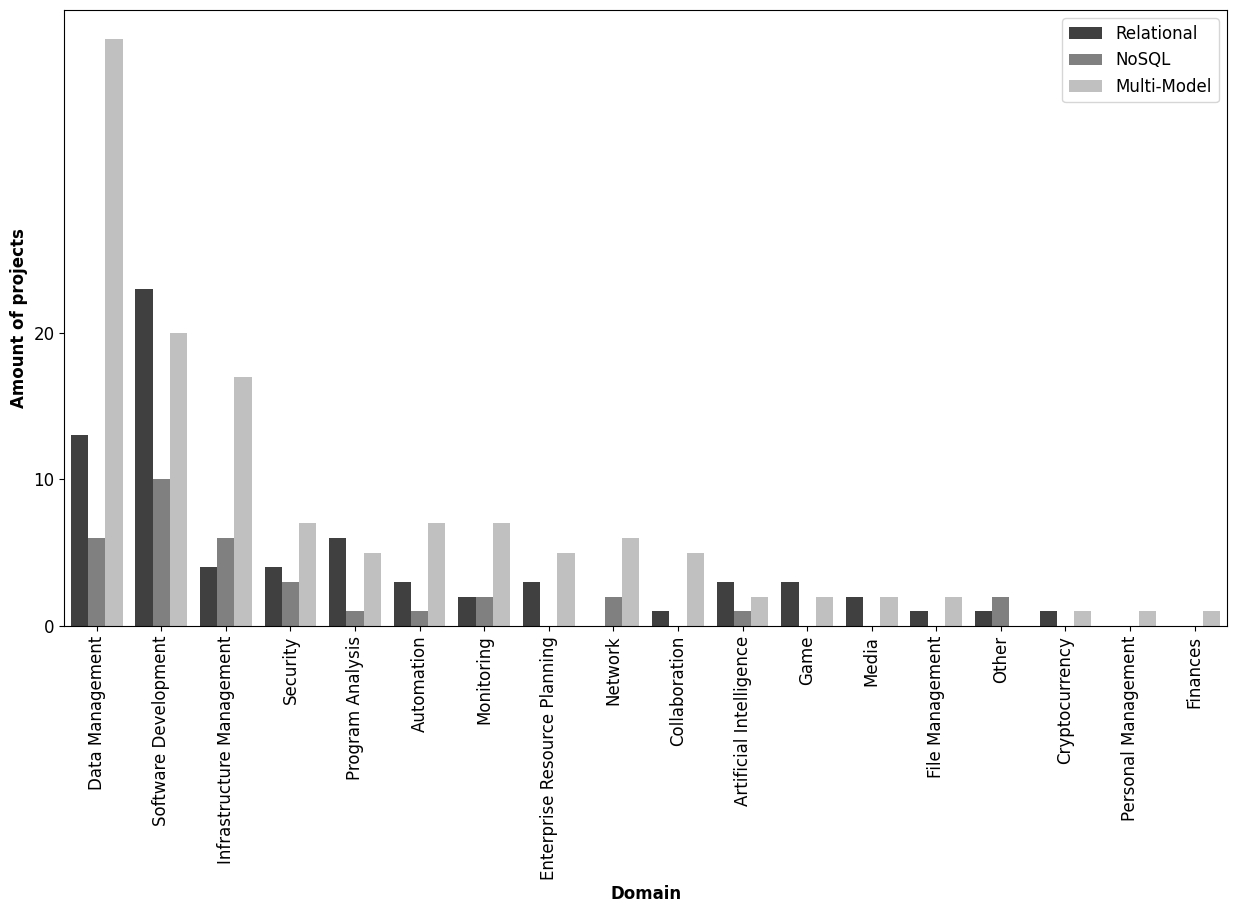

In [58]:
import seaborn as sns

fig = plt.figure(figsize= (15, 8))

domain_perfil = sns.barplot(data=table.melt(id_vars='Domain', value_name='Amount of projects', var_name='Model'), x='Domain', y='Amount of projects', hue='Model', palette='gray')
domain_perfil.set_xticklabels(table['Domain'],rotation = 90, fontsize = 12)
domain_perfil.set_xlabel("Domain",fontsize = 12, fontweight = 'bold')
domain_perfil.set_ylabel("Amount of projects",fontsize = 12, fontweight = 'bold')
plt.yticks(range(0, 30, 10), fontsize=12)
domain_perfil.legend(fontsize = 12)
plt.savefig(IMAGES_DIR+"/fig11.pdf", format="pdf", bbox_inches="tight")